### Utils

In [56]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [2]:
# Lecture des fichiers csv
def read_data(path:str,dest:list):
    with open(path) as csvfile:
        reader = csv.reader(csvfile,delimiter=",")
        for row in reader:
            dest.append(row)

### Stations de radio

On va modéliser le problème par un graphe non orienté avec chaque sommet représentant une station radio.
Un arc existe entre deux stations radios si elles sont à une distance inférieure à 3.
On fera une coloration du graphe en minimisant le nombre de couleurs, cela donnera le nombre de fréquences à utiliser.

In [3]:
# Coordonnées
X = []
Y = []
read_data("../data/X.csv",X)
read_data("../data/Y.csv",Y)
X = list(map(float, X[0]))
Y = list(map(float, Y[0]))

In [4]:
import math
# Calcul des distances
def distance(p1:tuple[float,float],p2:tuple[float,float])->float:
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

In [5]:
# Creation d'un graphe non orienté
G = nx.Graph()

# Ajout des Sommets
for i in range(len(X)):
    G.add_node(i)

# Ajout des Arcs quand la distance entre 2 nodes est inferieur à 3
for (i,u) in enumerate(zip(X,Y)):
    for (j,v) in enumerate(zip(X,Y)):
        dist = distance(u,v)
        if 0.0 < dist < 3:
            G.add_edge(i,j)
print(G.edges)

[(3, 24), (5, 27), (8, 12), (14, 16), (15, 33), (17, 18), (17, 22), (18, 22), (21, 28)]


In [6]:
# Coloration du graphe
d:dict[int,int] = nx.coloring.greedy_color(G,strategy="largest_first")
print(f"On obtient {max(d.values())+1} fréquences différentes")

On obtient 3 fréquences différentes


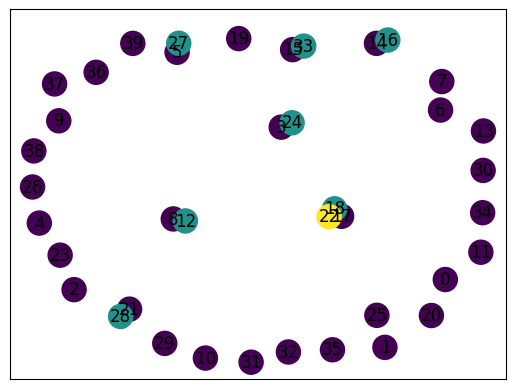

In [7]:
# Liste pour colorier les nodes
colors = [d[c] for c in range(len(X))]
# Visualiser le graphe
nx.draw_networkx(G,node_color=colors)
plt.show()

### Chemin

In [8]:
# Recuperation de la matrice
M = []
read_data("../data/M.csv",dest=M)

In [9]:
# Matrice d'adjacence 
M_adj = [[1 if int(weight)!=0 else 0 for weight in row] for row in M]
print(f"Matrice d'adjacence : {M_adj}")

Matrice d'adjacence : [[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [50]:
# Sommets et Arcs
S = set()
A = set()
WA = set()
for i in range(len(M[0])):
    S.add(i) # les sommets sont le nombre de lignes de la matrice d'adjacence
for (i,row) in enumerate(M):
    for (j,weight) in enumerate(row):
        if int(weight) > 0:
            A.add((i,j))
            WA.add((i,j,int(weight)))


print(f"Sommets : {S}")
print(f"Arcs : {A}")
print(f"Weighted edges : {WA}")

Sommets : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Arcs : {(3, 4), (12, 16), (16, 17), (4, 6), (12, 13), (5, 7), (8, 9), (0, 5), (9, 11), (17, 18), (13, 14), (16, 19), (6, 8), (6, 14), (15, 17), (18, 19), (5, 6), (3, 6), (12, 15), (14, 15), (0, 1), (9, 10), (2, 4), (1, 2), (9, 13), (10, 11), (10, 14), (13, 19), (15, 16), (4, 7), (12, 14), (8, 10), (2, 3), (11, 12), (2, 6), (13, 15), (7, 8), (7, 14)}
Weighted edges : {(0, 5, 10), (9, 11, 11), (2, 3, 22), (18, 19, 24), (12, 16, 22), (5, 6, 14), (16, 17, 26), (6, 14, 8), (16, 19, 8), (13, 15, 25), (10, 11, 30), (0, 1, 21), (1, 2, 17), (15, 16, 21), (13, 14, 18), (13, 19, 16), (9, 10, 21), (14, 15, 26), (6, 8, 12), (3, 4, 6), (17, 18, 28), (4, 6, 12), (11, 12, 27), (4, 7, 20), (12, 14, 8), (12, 13, 12), (15, 17, 18), (10, 14, 24), (3, 6, 21), (5, 7, 23), (7, 8, 8), (8, 9, 27), (12, 15, 21), (7, 14, 9), (9, 13, 15), (2, 6, 24), (2, 4, 12), (8, 10, 19)}


In [53]:
# Chemin optimal et Bellman recursif
def BF_recursif(t,k,G:nx.DiGraph,source)->tuple[float,list]:
    """
    Algorithme de Bellma-Ford via une fonction recursive, ce n'est pas la version la plus rapide
    """
    if k==0:
        if t==source:
            return 0.0,[source]
        else: 
            return float("inf"),[]
    
    current,current_path = BF_recursif(t=t,k=k-1,G=G,source=source)
    best = current
    best_path = current_path

    for s in G.predecessors(t):
        prev,prev_path = BF_recursif(s,k-1,G,source)
        prev += G[s][t]["weight"]
        if prev < best:
            best = prev
            best_path = prev_path+[t]
            
    return best,best_path

In [54]:
# Chemin minimal
"""
On ne sait pas entre quels points on doit établir ce chemin, j'ai pris le premier et dernier node
"""
# Création d'un graphe orienté avec poids
G = nx.DiGraph()
G.add_nodes_from(S)
G.add_weighted_edges_from(WA)

source,dest = list(G.nodes)[0],list(G.nodes)[-1]

best,path = BF_recursif(t=dest,k=len(G),G=G,source=source)
print(f"Pour aller de {source} à {dest}, le plus cours chemin est {path} de longueur {best}")


Pour aller de 0 à 19, le plus cours chemin est [0, 5, 6, 14, 15, 16, 19] de longueur 87.0


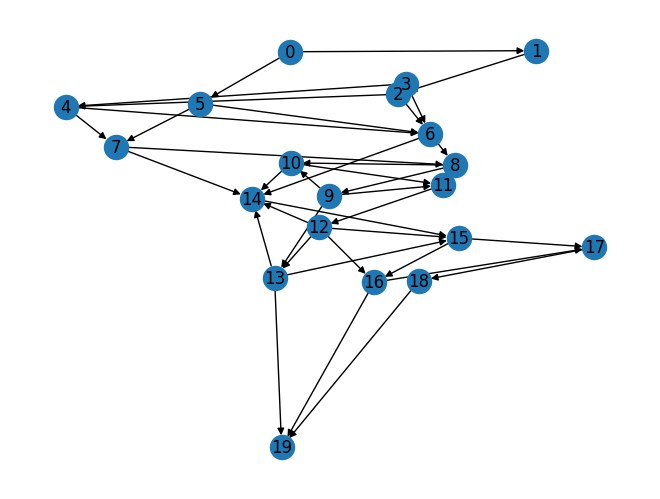

In [51]:
# Visualisation du graphe
nx.draw(G,with_labels=True)
plt.show()

### Flot

In [62]:
def DFS_chemins_avec_poids(Rf:nx.DiGraph,s,t):
    """Trouve tous les chemins de s à t avec poids > 0 via un DFS"""
    chemin_trouves = []
    pile = [[s]]

    while pile:
        chemin_actuel = pile.pop()

        if chemin_actuel[-1]==t:
            chemin_trouves.append(chemin_actuel)
            continue

        n = chemin_actuel[-1]

        for next_node in Rf.successors(n):
            if next_node not in chemin_actuel and Rf[n][next_node]["weight"] > 0:
                nouveau_chemin = list(chemin_actuel)
                nouveau_chemin.append(next_node)
                pile.append(nouveau_chemin)
    return chemin_trouves

In [63]:
"""Déterminons un flot de valeur maximale"""
# On utilise l'algorithme de Ford-Fulkerson
        
def FF_flot_maximum(G:nx.DiGraph,s,t):
    Rf = copy.deepcopy(G)
    list_edges = list(G.edges)
    for u, v in list_edges:
        if not Rf.has_edge(v, u):
            Rf.add_edge(v, u, weight=0)
    flot = {arc:0 for arc in list(G.edges)}
    valeur_totale_flot = 0
    while True:
        chemins = DFS_chemins_avec_poids(Rf,s,t)
        if chemins == []:
            break
        chemin_actuel = chemins.pop()
        aretes_chemin = [(chemin_actuel[i],chemin_actuel[i+1]) for i in range(len(chemin_actuel)-1)] # transformation en liste d'aretes
        delta = min([Rf[u[0]][u[1]]["weight"] for u in aretes_chemin]) 
        for (u,v) in aretes_chemin:
            if (u,v) in G.edges:
                flot[(u,v)] += delta
            else:
                flot[(v,u)] -= delta
            Rf[u][v]["weight"] -= delta
            Rf[v][u]["weight"] += delta
        valeur_totale_flot += delta
    return flot,valeur_totale_flot

In [64]:
flot,val_flot = FF_flot_maximum(G,s=0,t=19)
print(f"Flot : {flot} \nValeur du flot : {val_flot}")

Flot : {(0, 5): 10, (0, 1): 17, (1, 2): 17, (2, 3): 17, (2, 6): 0, (2, 4): 0, (3, 4): 6, (3, 6): 11, (4, 6): 0, (4, 7): 6, (5, 6): 9, (5, 7): 1, (6, 14): 8, (6, 8): 12, (7, 8): 7, (7, 14): 0, (8, 9): 19, (8, 10): 0, (9, 11): 11, (9, 10): 8, (9, 13): 0, (10, 11): 8, (10, 14): 0, (11, 12): 19, (12, 16): 19, (12, 14): 0, (12, 13): 0, (12, 15): 0, (13, 15): 0, (13, 14): 0, (13, 19): 0, (14, 15): 8, (15, 16): 8, (15, 17): 0, (16, 17): 24, (16, 19): 3, (17, 18): 24, (18, 19): 24} 
Valeur du flot : 27


### Planning